In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

In [17]:
iris = load_iris()

In [18]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
tsne = TSNE(n_components=2).fit_transform(df)
#모델선정,모델 학습 및 차원축소 적용

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
tsne
#2차원 Array로 결과값이 출력되는것을 볼 수 있다.

array([[ 21.944786  ,   8.439708  ],
       [ 24.481825  ,   7.2192016 ],
       [ 24.552193  ,   8.337997  ],
       [ 24.929508  ,   7.8874106 ],
       [ 21.795128  ,   8.024694  ],
       [ 19.948727  ,   8.329755  ],
       [ 24.41659   ,   8.735647  ],
       [ 22.682096  ,   8.110695  ],
       [ 25.677197  ,   7.8104773 ],
       [ 23.993189  ,   7.4901476 ],
       [ 20.540953  ,   8.911989  ],
       [ 23.184084  ,   7.547311  ],
       [ 24.780336  ,   7.380494  ],
       [ 25.889383  ,   8.389697  ],
       [ 19.289104  ,   9.221948  ],
       [ 19.004816  ,   8.718543  ],
       [ 19.908062  ,   8.770367  ],
       [ 21.883825  ,   8.386279  ],
       [ 19.83462   ,   9.297766  ],
       [ 20.783293  ,   8.01795   ],
       [ 21.34326   ,   9.502244  ],
       [ 21.09994   ,   7.970049  ],
       [ 24.428854  ,   9.550956  ],
       [ 22.646648  ,   9.126353  ],
       [ 22.980692  ,   6.756623  ],
       [ 24.026028  ,   6.927195  ],
       [ 22.427872  ,   7.6573114 ],
 

In [21]:
tsne_df = pd.DataFrame(tsne,columns=['component0','component1'])
#tsne 데이터를 데이터 프레임화

In [22]:
tsne_df

,component0,component1
0,21.944786,8.439708
1,24.481825,7.219202
2,24.552193,8.337997
3,24.929508,7.887411
4,21.795128,8.024694
...,...,...
145,-13.689340,-0.451367
146,-11.552912,-2.880727
147,-13.070328,-1.096514
148,-13.893079,0.466149


### t-SNE 2차원 데이터 시각화

In [23]:
tsne_df['target']=iris.target
#시각화를 위해 tsne데이터에 타겟값 추가

In [24]:
tsne_df

,component0,component1,target
0,21.944786,8.439708,0
1,24.481825,7.219202,0
2,24.552193,8.337997,0
3,24.929508,7.887411,0
4,21.795128,8.024694,0
...,...,...,...
145,-13.689340,-0.451367,2
146,-11.552912,-2.880727,2
147,-13.070328,-1.096514,2
148,-13.893079,0.466149,2


In [25]:
#타겟값에 따라 데이터를 분할
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

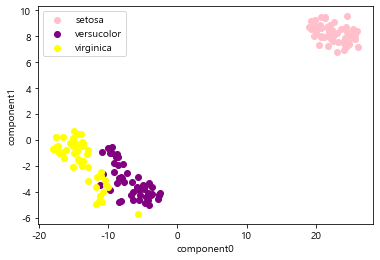

In [26]:
#t-SNE 데이터 시각화
#각각 target값에 따라 분할한 t-SNE 데이터를 시각화
plt.scatter(tsne_df_0['component0'],tsne_df_0['component1'],
           color='pink',label='setosa')
plt.scatter(tsne_df_1['component0'],tsne_df_1['component1'],
           color='purple',label='versucolor')
plt.scatter(tsne_df_2['component0'],tsne_df_2['component1'],
           color='yellow',label='virginica')
plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()

### 3차원 t-SNE 시각화

In [27]:
#t-sne모델 불러오기
tsne=TSNE(n_components=3)
#학습+변환 ->동시에
tsne=tsne.fit_transform(df)
#데이터프레임 변환시킨 데이터 바꾸기
tsne_df = pd.DataFrame(tsne,columns=['component0','component1','component2'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#시각화를 위한 타겟 데이터 =추가
tsne_df['target'] = iris.target

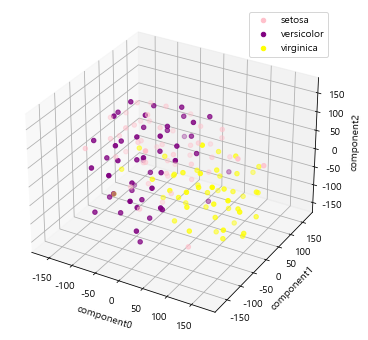

In [30]:
fig = plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d') #3차원 그래프 세팅

#타겟값에 따라 데이터를 분할
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

ax.scatter(tsne_df_0['component0'],tsne_df_0['component1'],tsne_df_0['component2'],
          color='pink',label='setosa')
ax.scatter(tsne_df_1['component0'],tsne_df_1['component1'],tsne_df_1['component2'],
          color='purple',label='versicolor')
ax.scatter(tsne_df_2['component0'],tsne_df_2['component1'],tsne_df_2['component2'],
          color='yellow',label='virginica')

ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.set_zlabel('component2')
ax.legend()
plt.show()